<a href="https://colab.research.google.com/github/AbhiAadi/Optimizing-AC-energy-requirement/blob/main/DEP_Single_output_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [33]:
Data = pd.read_excel('Building energy data.xlsx')
Data.head()

,S.No.,Date and time,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2023-01-02 09:00:00,269.9375,24.80,90.50,193189.0,14366.48,46680.6,-22115.20,64837.04
3,2.0,2023-01-02 10:00:00,451.0000,26.40,82.75,208709.9,34892.06,0.0,71372.86,18735.79
4,3.0,2023-01-02 11:00:00,257.5000,27.75,72.75,204338.6,30993.46,0.0,79076.78,10746.26


In [34]:
Data = Data.drop(0 , axis = 0)
Data = Data.drop(1 , axis = 0)
Data.head()

,S.No.,Date and time,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater
2,1.0,2023-01-02 09:00:00,269.9375,24.8000,90.500,193189.0,14366.48,46680.6,-22115.20,64837.04
3,2.0,2023-01-02 10:00:00,451.0000,26.4000,82.750,208709.9,34892.06,0.0,71372.86,18735.79
4,3.0,2023-01-02 11:00:00,257.5000,27.7500,72.750,204338.6,30993.46,0.0,79076.78,10746.26
5,4.0,2023-01-02 12:00:00,241.8750,28.5125,64.000,189399.4,21920.07,0.0,101663.50,-12261.10
6,5.0,2023-01-02 13:00:00,179.9375,28.6375,59.125,106161.8,29668.82,0.0,80126.27,9276.15


In [35]:
# Assuming 'datetime_column' is your datetime column
Data['Timestamp'] = pd.to_datetime(Data['Date and time']).astype(int) / 10**9
Data['Year'] = pd.to_datetime(Data['Date and time']).dt.year
Data['Month'] = pd.to_datetime(Data['Date and time']).dt.month
Data['Day'] = pd.to_datetime(Data['Date and time']).dt.day

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 2 to 2601
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   S.No.                                       2600 non-null   float64       
 1   Date and time                               2600 non-null   datetime64[ns]
 2   Radiative intensity                         2600 non-null   float64       
 3   T_air                                       2600 non-null   float64       
 4   RH_air                                      2600 non-null   float64       
 5   DOAS VC chiller supplied cooling energy     2600 non-null   float64       
 6   Radiant VA chiller supplied cooling energy  2600 non-null   float64       
 7   Heating energy by gas boiler                2600 non-null   float64       
 8   Heating energy by solar collector           2600 non-null   float64       
 9   Heating 

In [36]:
Data = Data.drop(['Date and time'], axis = 1)
# Data = Data[Data['Heating energy by auxiliary heater']>0]
Data

,S.No.,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater,Timestamp,Year,Month,Day
2,1.0,269.9375,24.8000,90.500,193189.00,14366.480,46680.60,-22115.20,64837.040,1.672650e+09,2023,1,2
3,2.0,451.0000,26.4000,82.750,208709.90,34892.060,0.00,71372.86,18735.790,1.672654e+09,2023,1,2
4,3.0,257.5000,27.7500,72.750,204338.60,30993.460,0.00,79076.78,10746.260,1.672657e+09,2023,1,2
5,4.0,241.8750,28.5125,64.000,189399.40,21920.070,0.00,101663.50,-12261.100,1.672661e+09,2023,1,2
6,5.0,179.9375,28.6375,59.125,106161.80,29668.820,0.00,80126.27,9276.150,1.672664e+09,2023,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2596.0,228.1875,28.5875,59.250,175259.40,27588.770,0.00,87765.03,4465.102,1.703858e+09,2023,12,29
2598,2597.0,130.8750,27.9625,61.875,172859.10,17531.660,11190.61,27514.84,50696.970,1.703862e+09,2023,12,29
2599,2598.0,50.9375,27.2625,65.500,171863.10,5750.690,95844.07,-37486.20,31044.520,1.703866e+09,2023,12,29
2600,2599.0,103.1875,26.6250,70.125,174849.90,3321.207,117616.60,-51861.10,23646.920,1.703869e+09,2023,12,29


Outliers in Radiative intensity:
       S.No.  Radiative intensity    T_air  RH_air  \
83      82.0            1241.7500  26.8625  75.875   
84      83.0             942.0625  28.2625  54.250   
144    143.0            1069.6880  30.0375  41.375   
306    305.0             955.3750  31.6000  47.875   
384    383.0             995.2500  30.7000  39.625   
853    852.0             996.5000  35.1250  59.250   
1225  1224.0             953.3750  37.0625  48.250   

      DOAS VC chiller supplied cooling energy  \
83                                   191825.1   
84                                   151632.9   
144                                  132611.4   
306                                  137997.9   
384                                  137217.8   
853                                  290021.9   
1225                                 290021.9   

      Radiant VA chiller supplied cooling energy  \
83                                      44726.93   
84                                   

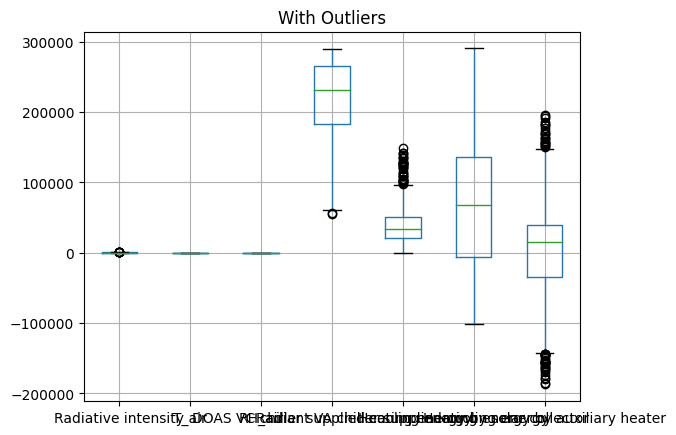

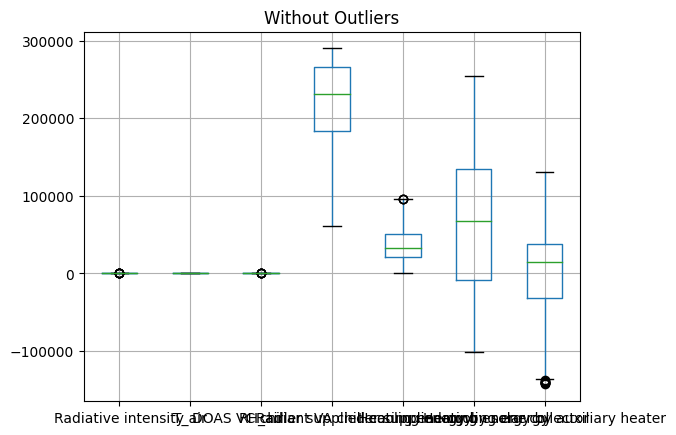

In [37]:
# Function to detect outliers using IQR
Data = Data.drop('Heating energy by gas boiler', axis = 1)
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Specify the columns for which you want to detect outliers
columns_to_check = ['Radiative intensity', 'T_air', 'RH_air', 'DOAS VC chiller supplied cooling energy', 'Radiant VA chiller supplied cooling energy',  'Heating energy by solar collector','Heating energy by auxiliary heater']

# Detect outliers for each column
outliers_dict = {}
for column in columns_to_check:
    outliers_dict[column] = detect_outliers(Data[column])

# Display outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(Data[outliers])

# Drop rows containing outliers
outliers_rows = outliers_dict[columns_to_check[0]]
for column in columns_to_check[1:]:
    outliers_rows |= outliers_dict[column]

cleaned_data = Data[~outliers_rows]

# Visualize the outliers using box plots
Data.boxplot(column=columns_to_check)
plt.title("With Outliers")
plt.show()

cleaned_data.boxplot(column=columns_to_check)
plt.title("Without Outliers")
plt.show()

In [38]:
cleaned_data.shape
cleaned_data

,S.No.,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by solar collector,Heating energy by auxiliary heater,Timestamp,Year,Month,Day
2,1.0,269.9375,24.8000,90.500,193189.00,14366.480,-22115.20,64837.040,1.672650e+09,2023,1,2
3,2.0,451.0000,26.4000,82.750,208709.90,34892.060,71372.86,18735.790,1.672654e+09,2023,1,2
4,3.0,257.5000,27.7500,72.750,204338.60,30993.460,79076.78,10746.260,1.672657e+09,2023,1,2
5,4.0,241.8750,28.5125,64.000,189399.40,21920.070,101663.50,-12261.100,1.672661e+09,2023,1,2
6,5.0,179.9375,28.6375,59.125,106161.80,29668.820,80126.27,9276.150,1.672664e+09,2023,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2596.0,228.1875,28.5875,59.250,175259.40,27588.770,87765.03,4465.102,1.703858e+09,2023,12,29
2598,2597.0,130.8750,27.9625,61.875,172859.10,17531.660,27514.84,50696.970,1.703862e+09,2023,12,29
2599,2598.0,50.9375,27.2625,65.500,171863.10,5750.690,-37486.20,31044.520,1.703866e+09,2023,12,29
2600,2599.0,103.1875,26.6250,70.125,174849.90,3321.207,-51861.10,23646.920,1.703869e+09,2023,12,29


In [39]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#
X = cleaned_data[['Timestamp','Year','Month','Day','Radiative intensity','T_air','RH_air']].values
y_DOAS = cleaned_data[['DOAS VC chiller supplied cooling energy']].values
y_Rad =cleaned_data[['Radiant VA chiller supplied cooling energy']].values
y_solar = cleaned_data[['Heating energy by solar collector']]
y_aux = cleaned_data[['Heating energy by auxiliary heater']]

# Initialize the MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y_D = MinMaxScaler()
scaler_y_R= MinMaxScaler()
scaler_y_S = MinMaxScaler()
scaler_y_A = MinMaxScaler()
# scaler = StandardScaler()
X_Normalized = scaler_x.fit_transform(X)
Y_Normalized_D = scaler_y_D.fit_transform(y_DOAS)
Y_Normalized_R = scaler_y_R.fit_transform(y_DOAS)
Y_Normalized_S = scaler_y_S.fit_transform(y_DOAS)
Y_Normalized_A = scaler_y_A.fit_transform(y_DOAS)

X_train, X_test, y_train_D, y_test_D = train_test_split(X_Normalized, Y_Normalized_D, test_size=0.2, random_state=42)
X_train, X_test, y_train_R, y_test_R = train_test_split(X_Normalized, Y_Normalized_R, test_size=0.2, random_state=42)
X_train, X_test, y_train_S, y_test_S = train_test_split(X_Normalized, Y_Normalized_S, test_size=0.2, random_state=42)
X_train, X_test, y_train_A, y_test_A = train_test_split(X_Normalized, Y_Normalized_A, test_size=0.2, random_state=42)

y_train_ = [y_train_D,y_train_R,y_train_S,y_train_A]
y_test_ = [y_test_D,y_test_R,y_test_S,y_test_A]

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers , regularizers
from tensorflow.keras.regularizers import l2 , l1
from tensorflow.keras.utils import plot_model

model = models.Sequential()

# Input layer
model.add(layers.Dense(16, activation='relu', input_shape=(7,)))

model.add(layers.Dense(32, activation='relu' ))

model.add(layers.Dense(64, activation='relu' ))

model.add(layers.Dense(128, activation='relu' ))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
# model.add(layers.Dense(512, activation='relu'))
#
# model.add(layers.Dense(1024, activation='relu'))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(8, activation='relu'))
# Output layer
model.add(layers.Dense(1, activation='linear'))


# Display the model summary
model.summary()
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 16)                128       
                                                                 
 dense_66 (Dense)            (None, 32)                544       
                                                                 
 dense_67 (Dense)            (None, 64)                2112      
                                                                 
 dense_68 (Dense)            (None, 128)               8320      
                                                                 
 dense_69 (Dense)            (None, 256)               33024     
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_70 (Dense)            (None, 512)              

In [41]:
import numpy as np
from keras import backend as K
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Avoid division by zero
    non_zero_mask = y_true != 0
    y_true, y_pred = y_true[non_zero_mask], y_pred[non_zero_mask]

    # Calculate MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return mape

def r2_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

Epoch 1/100
49/49 [==============================] - 3s 16ms/step - loss: 0.1363 - r2_metric: -1.4375 - val_loss: 0.0529 - val_r2_metric: -0.1412
Epoch 2/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0433 - r2_metric: 0.2152 - val_loss: 0.0310 - val_r2_metric: 0.3979
Epoch 3/100
49/49 [==============================] - 0s 10ms/step - loss: 0.0338 - r2_metric: 0.3774 - val_loss: 0.0326 - val_r2_metric: 0.2773
Epoch 4/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0296 - r2_metric: 0.4467 - val_loss: 0.0187 - val_r2_metric: 0.6480
Epoch 5/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0230 - r2_metric: 0.5640 - val_loss: 0.0205 - val_r2_metric: 0.5161
Epoch 6/100
49/49 [==============================] - 0s 10ms/step - loss: 0.0216 - r2_metric: 0.5883 - val_loss: 0.0213 - val_r2_metric: 0.4393
Epoch 7/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0178 - r2_metric: 0.6749 - val_loss: 0.0191 - val_r2_metri

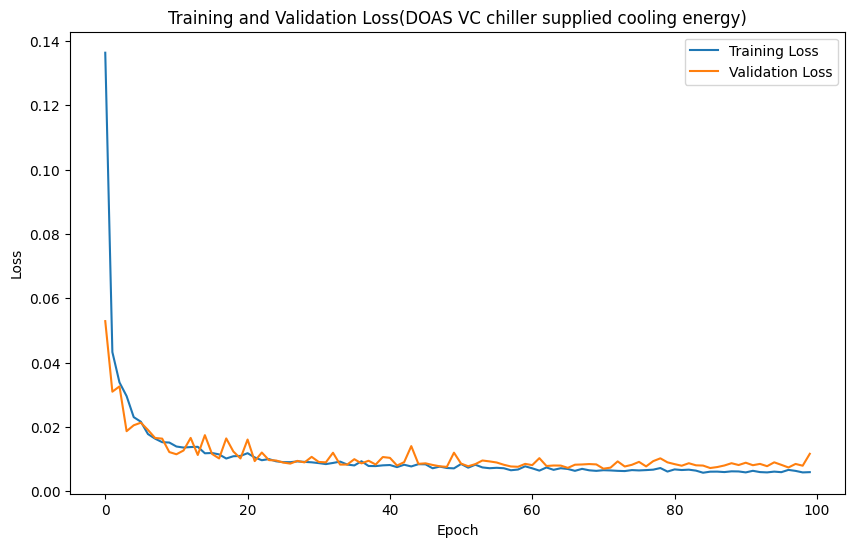

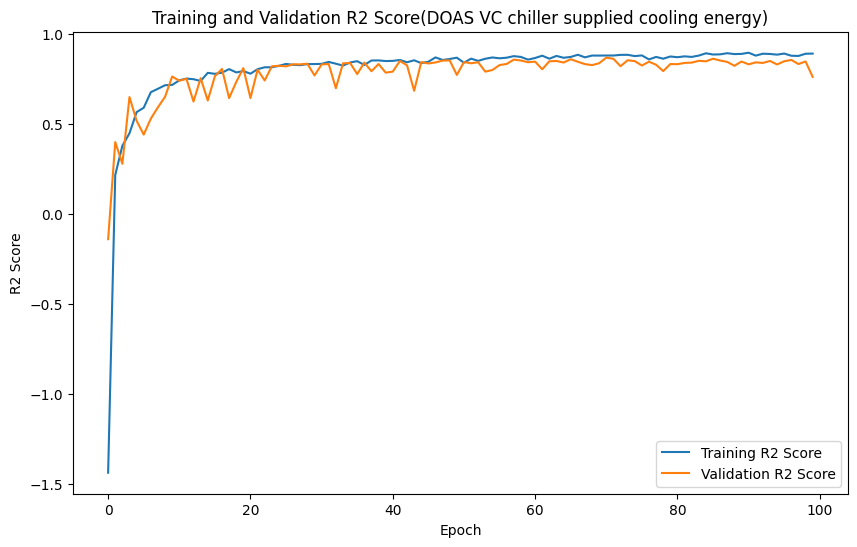

In [42]:
# # Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='mse' , metrics=[r2_metric])

# Train the model
history = model.fit(X_train, y_train_D, epochs=100, batch_size=42, validation_data=(X_test, y_test_D), verbose =1)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
mae = mean_absolute_percentage_error(y_test_D, y_pred)
mse = mean_squared_error(y_test_D, y_pred)
r_squared = r2_score(y_test_D, y_pred)
print('For test Data with output DOAS')
print(f'Mean Absolute Percentage Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')

mae_train = mean_absolute_percentage_error(y_train_D, y_pred_train)
mse_train = mean_squared_error(y_train_D, y_pred_train)
r_squared_train = r2_score(y_train_D, y_pred_train)
print('For train Data with output DOAS')
print(f'Mean Absolute Percentage Error (MAE): {mae_train}')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared: {r_squared_train}')
# Inverse transform predictions to original scale
y_pred_original_scale = scaler_y_D.inverse_transform(y_pred)
y_test_original_scale = scaler_y_D.inverse_transform(y_test_D)

# Calculate R-squared
print('\n')
print('For scaled data')
r_squared = r2_score(y_test_original_scale, y_pred_original_scale)
print(f'R-squared for original value(Scaled): {r_squared}')

mae_values = [mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale)]
mse_values = [mean_squared_error(y_test_original_scale, y_pred_original_scale) ]
r2_values = [r2_score(y_test_original_scale, y_pred_original_scale) ]

    # Display R-squared values for each output

print(f'R-squared for Output Dimension D: {r2_values}')

print(f'Mean Absolute Percentage Error (MAPE) D: {mae_values}')
print('\n')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss(DOAS VC chiller supplied cooling energy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_metric'], label='Training R2 Score')
plt.plot(history.history['val_r2_metric'], label='Validation R2 Score')
plt.title('Training and Validation R2 Score(DOAS VC chiller supplied cooling energy)')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

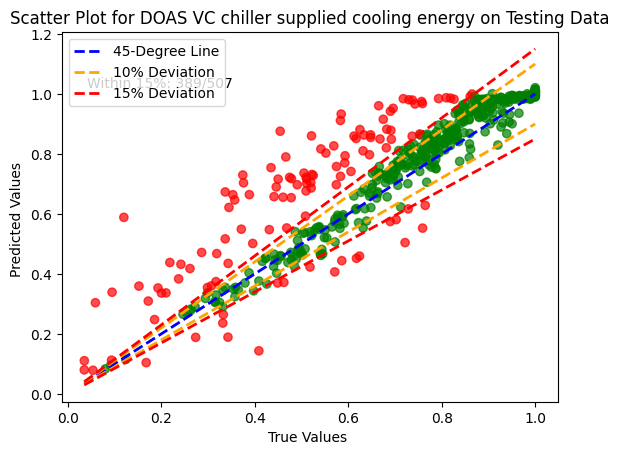

Number of data points within 15% deviation: 389/507
Number of data points within 10% deviation: 340/507


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are your training true and predicted values
true_values_train = y_test_D.flatten()
predicted_values_train = y_pred.flatten()

# Calculate the absolute percentage error for training data
absolute_percentage_error_train = np.abs((predicted_values_train - true_values_train) / true_values_train) * 100

# Set tolerance thresholds (e.g., 2% and 5%)
tolerance_threshold_2 = 10
tolerance_threshold_5 = 15

# Color-code the points based on the percentage difference
colors_train = np.where(absolute_percentage_error_train <= tolerance_threshold_5, 'green', 'red')

# Create a scatter plot for training data
plt.scatter(true_values_train, predicted_values_train, color=colors_train, alpha=0.7)
plt.plot([min(true_values_train), max(true_values_train)], [min(true_values_train), max(true_values_train)], linestyle='--', color='blue', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_2/100) * min(true_values_train), (1 - tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_2/100) * min(true_values_train), (1 + tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_5/100) * min(true_values_train), (1 - tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_5/100) * min(true_values_train), (1 + tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)

# Annotate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)
plt.annotate(f'Within {tolerance_threshold_5}%: {num_within_5_percent}/{len(true_values_train)}',
             xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='black')

# Custom legend handles
legend_handles = [
    Line2D([0], [0], linestyle='--', color='blue', linewidth=2),
    Line2D([0], [0], linestyle='--', color='orange', linewidth=2),
    Line2D([0], [0], linestyle='--', color='red', linewidth=2)
]

plt.xlabel('True Values ')
plt.ylabel('Predicted Values ')
plt.title('Scatter Plot for DOAS VC chiller supplied cooling energy on Testing Data')
plt.legend(legend_handles , ['45-Degree Line', f'10% Deviation', f'15% Deviation'], loc='upper left')
plt.show()

# Calculate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)

# Calculate the number of points within 2% deviation
num_within_2_percent = np.sum((absolute_percentage_error_train <= tolerance_threshold_2))

# Print the counts
print(f"Number of data points within 15% deviation: {num_within_5_percent}/{len(true_values_train)}")
print(f"Number of data points within 10% deviation: {num_within_2_percent}/{len(true_values_train)}")


Epoch 1/100
49/49 [==============================] - 3s 16ms/step - loss: 0.1342 - r2_metric: -1.5103 - val_loss: 0.0540 - val_r2_metric: -0.1549
Epoch 2/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0403 - r2_metric: 0.2413 - val_loss: 0.0405 - val_r2_metric: 0.0811
Epoch 3/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0263 - r2_metric: 0.5008 - val_loss: 0.0174 - val_r2_metric: 0.6124
Epoch 4/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0202 - r2_metric: 0.6297 - val_loss: 0.0144 - val_r2_metric: 0.7277
Epoch 5/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0176 - r2_metric: 0.6748 - val_loss: 0.0109 - val_r2_metric: 0.7667
Epoch 6/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0161 - r2_metric: 0.6926 - val_loss: 0.0165 - val_r2_metric: 0.5994
Epoch 7/100
49/49 [==============================] - 1s 17ms/step - loss: 0.0148 - r2_metric: 0.7267 - val_loss: 0.0101 - val_r2_metri

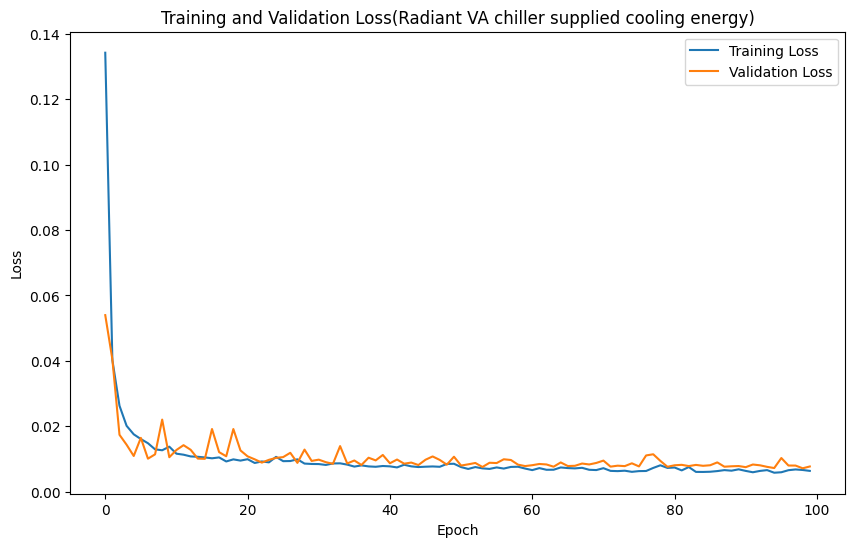

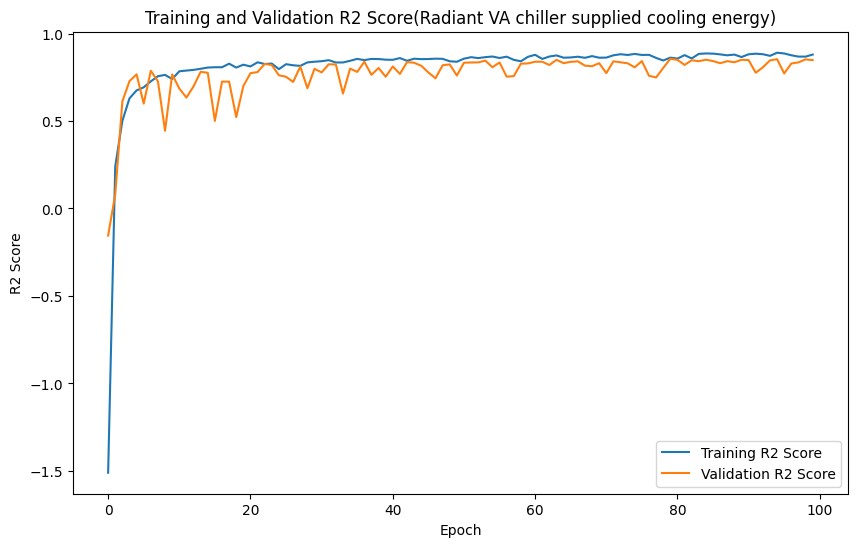

In [44]:
model = models.Sequential()

# Input layer
model.add(layers.Dense(16, activation='relu', input_shape=(7,) ))

model.add(layers.Dense(32, activation='relu' ))

model.add(layers.Dense(64, activation='relu' ))

model.add(layers.Dense(128, activation='relu' ))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
# model.add(layers.Dense(512, activation='relu'))
#
# model.add(layers.Dense(1024, activation='relu'))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(8, activation='relu'))
# Output layer
model.add(layers.Dense(1, activation='linear'))

 # Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='mse', metrics=[r2_metric])

# Train the model
history = model.fit(X_train, y_train_R, epochs=100, batch_size=42, validation_data=(X_test, y_test_R), verbose =1)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
mae = mean_absolute_percentage_error(y_test_R, y_pred)
mse = mean_squared_error(y_test_R, y_pred)
r_squared = r2_score(y_test_R, y_pred)
print('For test Data with output Rad')
print(f'Mean Absolute Percentage Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')

mae_train = mean_absolute_percentage_error(y_train_R, y_pred_train)
mse_train = mean_squared_error(y_train_R, y_pred_train)
r_squared_train = r2_score(y_train_R, y_pred_train)
print('For train Data with output Rad')
print(f'Mean Absolute Percentage Error (MAE): {mae_train}')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared: {r_squared_train}')
# Inverse transform predictions to original scale
y_pred_original_scale = scaler_y_R.inverse_transform(y_pred)
y_test_original_scale = scaler_y_R.inverse_transform(y_test_R)

# Calculate R-squared
print('\n')
print('For scaled data')
r_squared = r2_score(y_test_original_scale, y_pred_original_scale)
print(f'R-squared for original value(Scaled): {r_squared}')

mae_values = [mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale)]
mse_values = [mean_squared_error(y_test_original_scale, y_pred_original_scale) ]
r2_values = [r2_score(y_test_original_scale, y_pred_original_scale) ]

    # Display R-squared values for each output

print(f'R-squared for Output Dimension R: {r2_values}')

print(f'Mean Absolute Percentage Error (MAE) R: {mae_values}')
print('\n')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss(Radiant VA chiller supplied cooling energy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_metric'], label='Training R2 Score')
plt.plot(history.history['val_r2_metric'], label='Validation R2 Score')
plt.title('Training and Validation R2 Score(Radiant VA chiller supplied cooling energy)')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

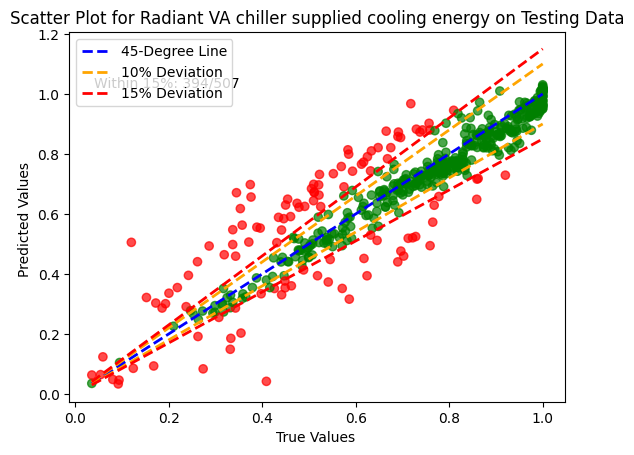

Number of data points within 15% deviation: 394/507
Number of data points within 10% deviation: 353/507


In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are your training true and predicted values
true_values_train = y_test_R.flatten()
predicted_values_train = y_pred.flatten()

# Calculate the absolute percentage error for training data
absolute_percentage_error_train = np.abs((predicted_values_train - true_values_train) / true_values_train) * 100

# Set tolerance thresholds (e.g., 2% and 5%)
tolerance_threshold_2 = 10
tolerance_threshold_5 = 15

# Color-code the points based on the percentage difference
colors_train = np.where(absolute_percentage_error_train <= tolerance_threshold_5, 'green', 'red')

# Create a scatter plot for training data
plt.scatter(true_values_train, predicted_values_train, color=colors_train, alpha=0.7)
plt.plot([min(true_values_train), max(true_values_train)], [min(true_values_train), max(true_values_train)], linestyle='--', color='blue', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_2/100) * min(true_values_train), (1 - tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_2/100) * min(true_values_train), (1 + tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_5/100) * min(true_values_train), (1 - tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_5/100) * min(true_values_train), (1 + tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)

# Annotate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)
plt.annotate(f'Within {tolerance_threshold_5}%: {num_within_5_percent}/{len(true_values_train)}',
             xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='black')

# Custom legend handles
legend_handles = [
    Line2D([0], [0], linestyle='--', color='blue', linewidth=2),
    Line2D([0], [0], linestyle='--', color='orange', linewidth=2),
    Line2D([0], [0], linestyle='--', color='red', linewidth=2)
]

plt.xlabel('True Values ')
plt.ylabel('Predicted Values ')
plt.title('Scatter Plot for Radiant VA chiller supplied cooling energy on Testing Data')
plt.legend(legend_handles , ['45-Degree Line', f'10% Deviation', f'15% Deviation'], loc='upper left')
plt.show()

# Calculate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)

# Calculate the number of points within 2% deviation
num_within_2_percent = np.sum((absolute_percentage_error_train <= tolerance_threshold_2))

# Print the counts
print(f"Number of data points within 15% deviation: {num_within_5_percent}/{len(true_values_train)}")
print(f"Number of data points within 10% deviation: {num_within_2_percent}/{len(true_values_train)}")


Epoch 1/100
49/49 [==============================] - 3s 18ms/step - loss: 0.1153 - r2_metric: -1.2827 - val_loss: 0.0359 - val_r2_metric: 0.2393
Epoch 2/100
49/49 [==============================] - 1s 18ms/step - loss: 0.0358 - r2_metric: 0.3300 - val_loss: 0.0233 - val_r2_metric: 0.4804
Epoch 3/100
49/49 [==============================] - 1s 19ms/step - loss: 0.0246 - r2_metric: 0.5496 - val_loss: 0.0172 - val_r2_metric: 0.6090
Epoch 4/100
49/49 [==============================] - 1s 13ms/step - loss: 0.0172 - r2_metric: 0.6679 - val_loss: 0.0194 - val_r2_metric: 0.5645
Epoch 5/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0159 - r2_metric: 0.7069 - val_loss: 0.0110 - val_r2_metric: 0.7741
Epoch 6/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0161 - r2_metric: 0.6972 - val_loss: 0.0173 - val_r2_metric: 0.6171
Epoch 7/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0140 - r2_metric: 0.7334 - val_loss: 0.0110 - val_r2_metric

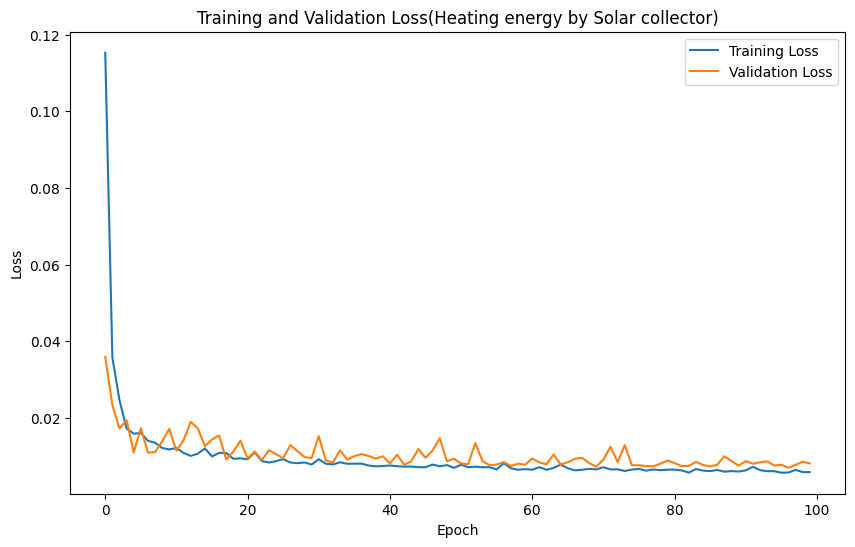

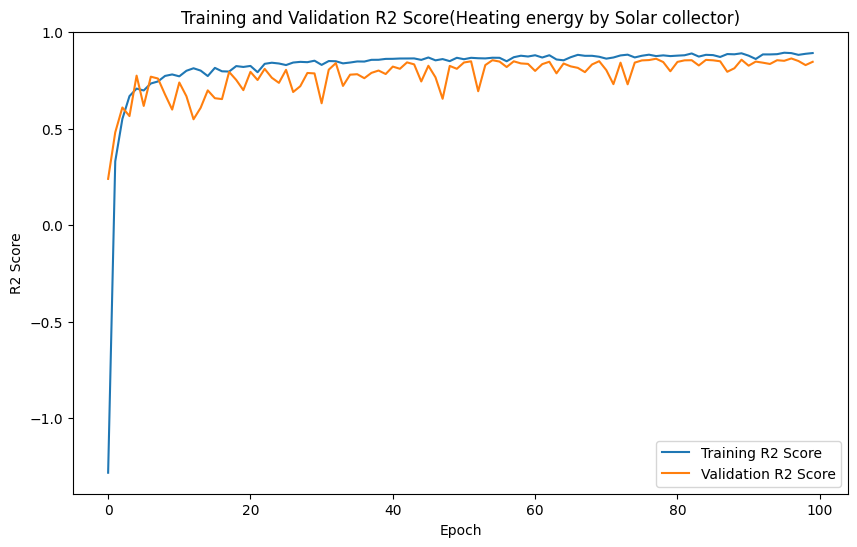

In [46]:
model = models.Sequential()

# Input layer
# Input layer
model.add(layers.Dense(16, activation='relu', input_shape=(7,) ))

model.add(layers.Dense(32, activation='relu' ))

model.add(layers.Dense(64, activation='relu' ))

model.add(layers.Dense(128, activation='relu' ))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
# model.add(layers.Dense(512, activation='relu'))
#
# model.add(layers.Dense(1024, activation='relu'))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(8, activation='relu'))
# Output layer
model.add(layers.Dense(1, activation='linear'))

 # Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='mse', metrics=[r2_metric])

# Train the model
history = model.fit(X_train, y_train_S, epochs=100, batch_size=42, validation_data=(X_test, y_test_S), verbose =1)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
mae = mean_absolute_percentage_error(y_test_S, y_pred)
mse = mean_squared_error(y_test_S, y_pred)
r_squared = r2_score(y_test_S, y_pred)
print('For test Data with output Solar')
print(f'Mean Absolute percentage Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')

mae_train = mean_absolute_percentage_error(y_train_S, y_pred_train)
mse_train = mean_squared_error(y_train_S, y_pred_train)
r_squared_train = r2_score(y_train_S, y_pred_train)
print('For train Data with output Solar')
print(f'Mean Absolute percentage Error (MAE): {mae_train}')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared: {r_squared_train}')
# Inverse transform predictions to original scale
y_pred_original_scale = scaler_y_S.inverse_transform(y_pred)
y_test_original_scale = scaler_y_S.inverse_transform(y_test_S)

# Calculate R-squared
print('\n')
print('For scaled data')
r_squared = r2_score(y_test_original_scale, y_pred_original_scale)
print(f'R-squared for original value(Scaled): {r_squared}')

mae_values = [mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale)]
mse_values = [mean_squared_error(y_test_original_scale, y_pred_original_scale) ]
r2_values = [r2_score(y_test_original_scale, y_pred_original_scale) ]

    # Display R-squared values for each output

print(f'R-squared for Output Dimension S: {r2_values}')

print(f'Mean Absolute percentage Error (MAE) S: {mae_values}')
print('\n')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss(Heating energy by Solar collector)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_metric'], label='Training R2 Score')
plt.plot(history.history['val_r2_metric'], label='Validation R2 Score')
plt.title('Training and Validation R2 Score(Heating energy by Solar collector)')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

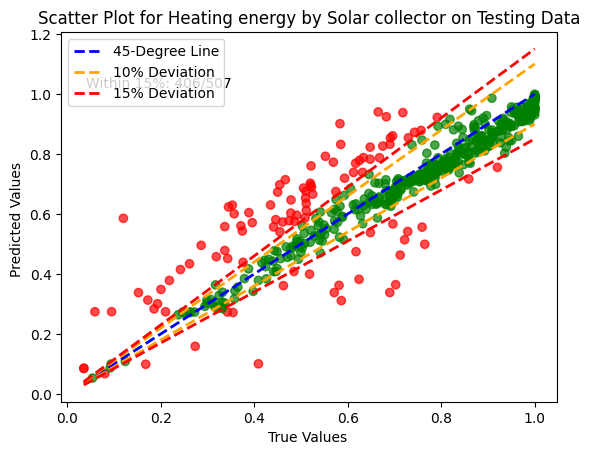

Number of data points within 15% deviation: 406/507
Number of data points within 10% deviation: 371/507


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are your training true and predicted values
true_values_train = y_test_S.flatten()
predicted_values_train = y_pred.flatten()

# Calculate the absolute percentage error for training data
absolute_percentage_error_train = np.abs((predicted_values_train - true_values_train) / true_values_train) * 100

# Set tolerance thresholds (e.g., 2% and 5%)
tolerance_threshold_2 = 10
tolerance_threshold_5 = 15

# Color-code the points based on the percentage difference
colors_train = np.where(absolute_percentage_error_train <= tolerance_threshold_5, 'green', 'red')

# Create a scatter plot for training data
plt.scatter(true_values_train, predicted_values_train, color=colors_train, alpha=0.7)
plt.plot([min(true_values_train), max(true_values_train)], [min(true_values_train), max(true_values_train)], linestyle='--', color='blue', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_2/100) * min(true_values_train), (1 - tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_2/100) * min(true_values_train), (1 + tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_5/100) * min(true_values_train), (1 - tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_5/100) * min(true_values_train), (1 + tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)

# Annotate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)
plt.annotate(f'Within {tolerance_threshold_5}%: {num_within_5_percent}/{len(true_values_train)}',
             xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='black')

# Custom legend handles
legend_handles = [
    Line2D([0], [0], linestyle='--', color='blue', linewidth=2),
    Line2D([0], [0], linestyle='--', color='orange', linewidth=2),
    Line2D([0], [0], linestyle='--', color='red', linewidth=2)
]

plt.xlabel('True Values ')
plt.ylabel('Predicted Values ')
plt.title('Scatter Plot for Heating energy by Solar collector on Testing Data')
plt.legend(legend_handles , ['45-Degree Line', f'10% Deviation', f'15% Deviation'], loc='upper left')
plt.show()

# Calculate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)

# Calculate the number of points within 2% deviation
num_within_2_percent = np.sum((absolute_percentage_error_train <= tolerance_threshold_2))

# Print the counts
print(f"Number of data points within 15% deviation: {num_within_5_percent}/{len(true_values_train)}")
print(f"Number of data points within 10% deviation: {num_within_2_percent}/{len(true_values_train)}")


Epoch 1/100
49/49 [==============================] - 4s 17ms/step - loss: 0.1350 - r2_metric: -1.5814 - val_loss: 0.0453 - val_r2_metric: 0.1686
Epoch 2/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0429 - r2_metric: 0.2206 - val_loss: 0.0304 - val_r2_metric: 0.3500
Epoch 3/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0260 - r2_metric: 0.4831 - val_loss: 0.0217 - val_r2_metric: 0.5032
Epoch 4/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0194 - r2_metric: 0.6426 - val_loss: 0.0201 - val_r2_metric: 0.4692
Epoch 5/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0173 - r2_metric: 0.6785 - val_loss: 0.0114 - val_r2_metric: 0.7572
Epoch 6/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0149 - r2_metric: 0.7252 - val_loss: 0.0139 - val_r2_metric: 0.6631
Epoch 7/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0144 - r2_metric: 0.7327 - val_loss: 0.0145 - val_r2_metric

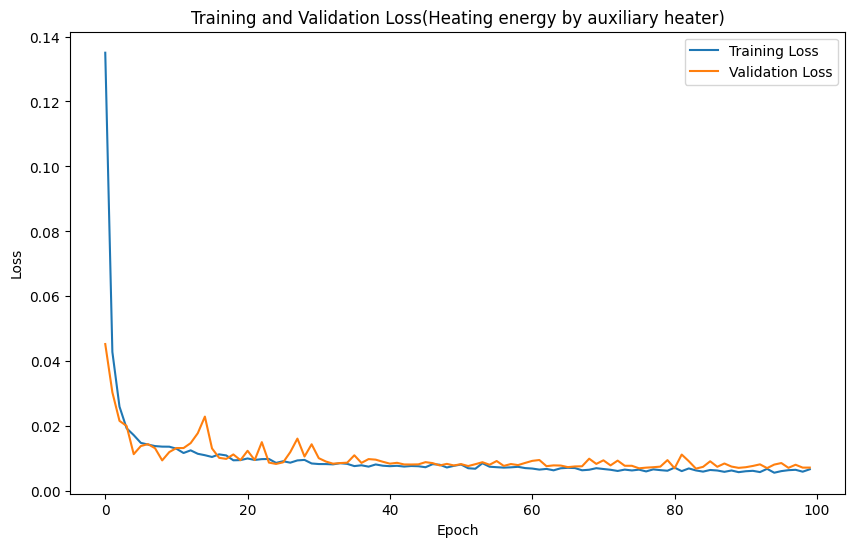

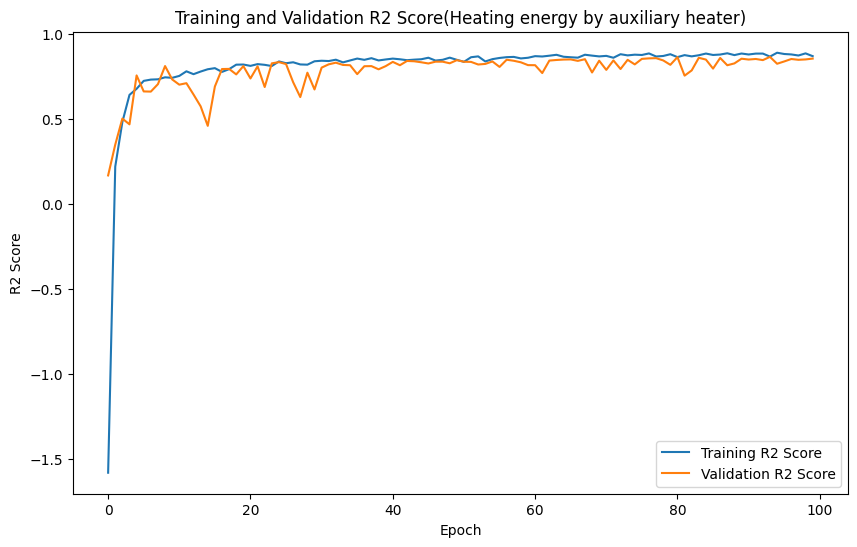

In [48]:
model = models.Sequential()

# Input layer
model.add(layers.Dense(16, activation='relu', input_shape=(7,) ))

model.add(layers.Dense(32, activation='relu' ))

model.add(layers.Dense(64, activation='relu' ))

model.add(layers.Dense(128, activation='relu' ))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
# model.add(layers.Dense(512, activation='relu'))
#
# model.add(layers.Dense(1024, activation='relu'))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(8, activation='relu'))
# Output layer
model.add(layers.Dense(1, activation='linear'))

# Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='mse', metrics=[r2_metric])

# Train the model
history = model.fit(X_train, y_train_A, epochs=100, batch_size=42, validation_data=(X_test, y_test_A), verbose =1)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
mae = mean_absolute_percentage_error(y_test_A, y_pred)
mse = mean_squared_error(y_test_A, y_pred)
r_squared = r2_score(y_test_A, y_pred)
print('For test Data with output Auxiliary')
print(f'Mean Absolute percentage Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')

mae_train = mean_absolute_percentage_error(y_train_A, y_pred_train)
mse_train = mean_squared_error(y_train_A, y_pred_train)
r_squared_train = r2_score(y_train_A, y_pred_train)
print('For train Data with output Aux')
print(f'Mean Absolute percentage Error (MAE): {mae_train}')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared: {r_squared_train}')
# Inverse transform predictions to original scale
y_pred_original_scale = scaler_y_A.inverse_transform(y_pred)
y_test_original_scale = scaler_y_A.inverse_transform(y_test_A)

# Calculate R-squared
print('\n')
print('For scaled data')
r_squared = r2_score(y_test_original_scale, y_pred_original_scale)
print(f'R-squared for original value(Scaled): {r_squared}')

mae_values = [mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale)]
mse_values = [mean_squared_error(y_test_original_scale, y_pred_original_scale) ]
r2_values = [r2_score(y_test_original_scale, y_pred_original_scale) ]

    # Display R-squared values for each output

print(f'R-squared for Output Dimension A: {r2_values}')

print(f'Mean Absolute percentage Error (MAE) A: {mae_values}')
print('\n')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss(Heating energy by auxiliary heater)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_metric'], label='Training R2 Score')
plt.plot(history.history['val_r2_metric'], label='Validation R2 Score')
plt.title('Training and Validation R2 Score(Heating energy by auxiliary heater)')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

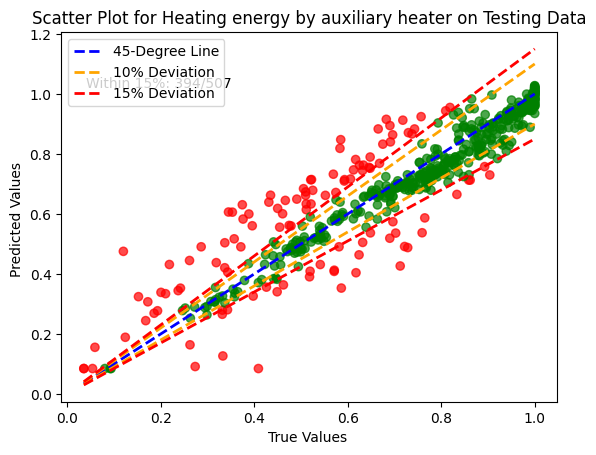

Number of data points within 15% deviation: 394/507
Number of data points within 10% deviation: 356/507


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are your training true and predicted values
true_values_train = y_test_A.flatten()
predicted_values_train = y_pred.flatten()

# Calculate the absolute percentage error for training data
absolute_percentage_error_train = np.abs((predicted_values_train - true_values_train) / true_values_train) * 100

# Set tolerance thresholds (e.g., 2% and 5%)
tolerance_threshold_2 = 10
tolerance_threshold_5 = 15

# Color-code the points based on the percentage difference
colors_train = np.where(absolute_percentage_error_train <= tolerance_threshold_5, 'green', 'red')

# Create a scatter plot for training data
plt.scatter(true_values_train, predicted_values_train, color=colors_train, alpha=0.7)
plt.plot([min(true_values_train), max(true_values_train)], [min(true_values_train), max(true_values_train)], linestyle='--', color='blue', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_2/100) * min(true_values_train), (1 - tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_2/100) * min(true_values_train), (1 + tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_5/100) * min(true_values_train), (1 - tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_5/100) * min(true_values_train), (1 + tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)

# Annotate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)
plt.annotate(f'Within {tolerance_threshold_5}%: {num_within_5_percent}/{len(true_values_train)}',
             xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='black')

# Custom legend handles
legend_handles = [
    Line2D([0], [0], linestyle='--', color='blue', linewidth=2),
    Line2D([0], [0], linestyle='--', color='orange', linewidth=2),
    Line2D([0], [0], linestyle='--', color='red', linewidth=2)]


plt.xlabel('True Values ')
plt.ylabel('Predicted Values ')
plt.title('Scatter Plot for Heating energy by auxiliary heater on Testing Data')
plt.legend(legend_handles , ['45-Degree Line', f'10% Deviation', f'15% Deviation'], loc='upper left')
plt.show()

# Calculate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)

# Calculate the number of points within 2% deviation
num_within_2_percent = np.sum((absolute_percentage_error_train <= tolerance_threshold_2))

# Print the counts
print(f"Number of data points within 15% deviation: {num_within_5_percent}/{len(true_values_train)}")
print(f"Number of data points within 10% deviation: {num_within_2_percent}/{len(true_values_train)}")


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
df = pd.read_excel('/content/DEP_data of paper.xlsx', engine='openpyxl')

# # Assuming your Excel file has columns 'Category' and 'Value'
# # Replace 'Category' and 'Value' with your actual column names
# category_values = df.groupby('Category')['Value'].sum()

# # Plotting the bar graph
# category_values.plot(kind='bar')

# # Adding labels and title
# plt.xlabel('Category')
# plt.ylabel('Total Value')
# plt.title('Total Value by Category')

# # Show the plot
# plt.show()
import pandas as pd
import matplotlib.pyplot as plt
print(df.columns)
# Assuming your DataFrame is named df
# Selecting the relevant columns
df['Unnamed: 0'] = 'Model '+ df['Unnamed: 0'].astype(str)

df_subset = df[['Unnamed: 0', 'Training  Error(%).3', 'Testing Error(%).3']]

# Setting 'Unnamed: 0' as the index
df_subset.set_index('Unnamed: 0', inplace=True)

# Plotting the multiple bar graph
ax = df_subset.plot(kind='bar', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Error (%)')
plt.title('Training and Testing error for Heating energy by auxiliary heater')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height()+0.2, str(round(i.get_height(), 2)), ha='center', va='bottom', rotation = 90)


# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)
plt.ylim(0, 25)
# Show the plot
plt.legend(loc = 'upper left', labels=['Training error', 'Testing error'])
plt.tight_layout()
plt.show()

'''Radiant VA chiller supplied cooling energy
DOAS VC chiller supplied cooling energy
Heating energy by solar collector
Heating energy by auxiliary heater
'''

FileNotFoundError: [Errno 2] No such file or directory: '/content/DEP_data of paper.xlsx'